# Project: Wrangle and Analyze Data

## Table of Contents

- [Introduction](#intro)
- [Part I - Gather Data](#gather)
- [Part II - Assess Data](#assess)
- [Part III - Clean Data](#clean)
- [Part IV - Analysis & Visualization](#analyze)

<a id='intro'></a>
## Introduction

The dataset that we will be wrangling, analyzing and visualizing is the tweet archive of **Twitter user @dog_rates, also known as WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has **over 8 million followers** and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The data will be gathered in three different ways:
 - File on hand
 - Download programmatically from the Internet
 - Access via Twitter API

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

<a id='gather'></a>
## Part I - Gather Data

### The WeRateDogs Twitter archive (File on hand)

This data was available for download for the project and has been downloaded manually.

In [2]:
# Store the WeRateDogs Twitter archive in df_archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### The Tweet Image Predictions (Download programmatically from the Internet)

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is hosted on Udacity's servers and has to be downloaded programmatically using the Requests library.

As we see below, the file contains the top three predictions including probability that the neural network made for the image of every tweet.

In [4]:
# Request the data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Store the data in a file in the same directory
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

# Store the data in df_predictions
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### The Retweet & Favorite Count (Access via Twitter API)

Retweet count and favorite count are two of the notable column omissions. They are not present in `df_archive` or `df_predictions`. This additional data can be gathered from Twitter's API.

Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt`.

Instructions:

- We only want original ratings (no retweets) that have images.
- We do not need to gather the tweets beyond August 1st, 2017 since `df_archive` only contains older tweets.
- The tweets corresponding to a few tweet IDs in the `df_archive` may have been delete.

In [6]:
# Create an API object to gather Twitter data
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# Store the tweet info of the df_archive tweets in tweet_json.txt
start = time.time()
deleted_tweets = []

with open('tweet_json.txt', mode='w') as file:
    for tweet in df_archive['tweet_id']:
        try:
            status = api.get_status(tweet, tweet_mode='extended')
            status = json.dumps(status._json)
            file.write(status+'\n')
        except:
            deleted_tweets.append(tweet)
            
print('List of deleted tweets:\n{}\n'.format(deleted_tweets))

end = time.time()
print('--- Execution time: {} seconds ---'.format(round(end - start, 2)))

Rate limit reached. Sleeping for: 697
Rate limit reached. Sleeping for: 357


List of deleted tweets:
[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 851953902622658560, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 759566828574212096, 754011816964026368, 687102708889812993, 687096057537363968, 686947101016735744, 686760001961103360, 686749460672679938, 680055455951884288]

--- Execution time: 1939.46 seconds ---


In [8]:
# Open tweet_json.txt and store retweet_count, favorite_count and date in dataframe
tweets = open('tweet_json.txt', 'r')
df_api = []
no_media = []
retweet = []
no_image = []

# Month mapping to extract the date
month_mapping = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
i=1
for status in tweets:
    # String to JSON
    status = json.loads(status)

    retweet_count = status['retweet_count']
    favorite_count = status['favorite_count']
    tweet_id = status['id']
    
    # You only want original ratings (no retweets) that have images.
    # Media
    try:
        status['entities']['media']
        # Retweet: Append Retweet ID
        try:
            status['retweeted_status']
            retweet.append(tweet_id)
        # No Retweet: Append to df_api (this is what we want!)
        except:
                # Only select posts with images
                if status['entities']['media'][0]['type'] == 'photo':
                    month = month_mapping[status['created_at'][4:7]]
                    day = status['created_at'][8:10]
                    year = status['created_at'][-4:]
                    date = str(year) + '-' + str(month) + '-' + str(day)

                    df_api.append({'tweet_id': tweet_id,
                                   'date': date,
                                   'media': True,
                                   'retweet': False,
                                   'retweet_count': retweet_count,
                                   'favorite_count': favorite_count})
                # Posts with media, but no image
                else:
                    no_image.append(tweet_id)
            
    # No Media: Append No Media ID
    except:
        no_media.append(tweet_id)
        
        # Retweet: Append Retweet ID
        try:
            status['retweeted_status']
            retweet.append(tweet_id)
        # No Retweet: No effect
        except:
            retweet = retweet

    i=i+1

df_api = pd.DataFrame(df_api)

# You do not need to gather the tweets beyond August 1st, 2017
df_api['date'] = pd.to_datetime(df_api['date'])
df_api = df_api[df_api['date'] < '2017-08-01']

In [9]:
# The following tweets have not been stored in df_api (we only want posts with images)
print('List of tweets with no media:\n{}\n'.format(no_media))
print('List of tweets with media but no image:\n{}\n'.format(no_image))
print('List of retweets:\n{}\n'.format(retweet))

List of tweets with no media:
[886267009285017600, 886054160059072513, 885518971528720385, 884247878851493888, 881633300179243008, 879674319642796034, 879130579576475649, 878604707211726852, 878404777348136964, 878316110768087041, 876537666061221889, 875097192612077568, 874434818259525634, 873337748698140672, 871166179821445120, 871102520638267392, 870726314365509632, 868639477480148993, 866720684873056260, 866094527597207552, 863471782782697472, 863427515083354112, 860981674716409858, 860177593139703809, 858860390427611136, 857214891891077121, 857062103051644929, 856330835276025856, 856288084350160898, 855862651834028034, 855860136149123072, 855857698524602368, 855818117272018944, 855245323840757760, 855138241867124737, 852936405516943360, 850333567704068097, 849668094696017920, 848213670039564288, 847978865427394560, 847617282490613760, 846505985330044928, 846139713627017216, 845098359547420673, 843981021012017153, 841320156043304961, 840761248237133825, 840728873075638272, 840698636

In [10]:
df_api.head()

,tweet_id,date,media,retweet,retweet_count,favorite_count
2,891815181378084864,2017-07-31,True,False,3740,23317
3,891689557279858688,2017-07-30,True,False,7798,39204
4,891327558926688256,2017-07-29,True,False,8394,37448
5,891087950875897856,2017-07-29,True,False,2818,18871
6,890971913173991426,2017-07-28,True,False,1834,10963


<a id='assess'></a>
## Part II - Assess Data

- The requirements of this project are only to assess and clean:
   - **at least 8 quality issues** and
   - **at least 2 tidiness issues**.
   
Instructions:
- The ratings probably aren't all correct.
- Same goes for the dog names and probably dog stages, too.
- These columns need to be assessed and cleaned for using them for analysis and visualization.

### Visual Assessment

In [11]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
df_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df_api.head(5)

,tweet_id,date,media,retweet,retweet_count,favorite_count
2,891815181378084864,2017-07-31,True,False,3740,23317
3,891689557279858688,2017-07-30,True,False,7798,39204
4,891327558926688256,2017-07-29,True,False,8394,37448
5,891087950875897856,2017-07-29,True,False,2818,18871
6,890971913173991426,2017-07-28,True,False,1834,10963


**Finding:** `df_predictions`: Some predictions are no dog breeds, e.g. box_turtle, shopping_cart.

### Programmatic Assessment

In [14]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 2 to 1982
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1981 non-null   int64         
 1   date            1981 non-null   datetime64[ns]
 2   media           1981 non-null   bool          
 3   retweet         1981 non-null   bool          
 4   retweet_count   1981 non-null   int64         
 5   favorite_count  1981 non-null   int64         
dtypes: bool(2), datetime64[ns](1), int64(3)
memory usage: 81.3 KB


In [17]:
df_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    df_archive['rating_denominator'] != 10]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


**Finding:** First fraction of text was extracted to *rating_numerator* and *rating_denominator* which is not always the rating.

In [18]:
df_archive[['tweet_id', 'text', 'rating_numerator','rating_denominator']][
    df_archive['text'].str.contains(pat='[0-9]+[.][0-9]+/[0-9]+')]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


**Finding:** Float ratings were extracted incorrectly.

In [19]:
df_archive.rating_numerator.min(), df_archive.rating_numerator.max()

(0, 1776)

In [20]:
df_archive['rating_numerator'].value_counts().sort_index(ascending=False)[:10]

1776    1
960     1
666     1
420     2
204     1
182     1
165     1
144     1
143     1
121     1
Name: rating_numerator, dtype: int64

In [21]:
df_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    df_archive.rating_numerator > 100]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


**Finding:** *rating_numerator* ranges from 0 to 1776. The maximum *rating_numerator* 1776 was extracted correctly (1776 because of Declaration of Independence), other outliers are not. 

In [22]:
df_archive.rating_denominator.min(), df_archive.rating_denominator.max()

(0, 170)

In [23]:
df_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    df_archive.rating_denominator == 170]

,tweet_id,text,rating_numerator,rating_denominator
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170


**Finding:** *rating_denominator* ranges from 0 to 170. If multiple dogs are in a picture, *rating_denominator* is greater than 10.

In [24]:
df_archive.name.value_counts()[:15]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Daisy        7
Toby         7
Name: name, dtype: int64

In [25]:
df_archive[['tweet_id', 'text', 'name']][(df_archive['name'] == 'a') |
                                         (df_archive['name'] == 'an') |
                                         (df_archive['name'] == 'the')]

,tweet_id,text,name
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
759,778396591732486144,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,an
801,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
1017,746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
1025,746369468511756288,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,an
1049,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
1193,717537687239008257,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a


**Finding:** Some dog names were extracted incorrectly. The word after 'This is' has been extracted as the name which is incorrect in many cases.

In [26]:
df_archive[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']].loc[
    (df_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
460,817777686764523521,doggo,None,pupper,None
531,808106460588765185,doggo,None,pupper,None
565,802265048156610565,doggo,None,pupper,None
575,801115127852503040,doggo,None,pupper,None
705,785639753186217984,doggo,None,pupper,None
733,781308096455073793,doggo,None,pupper,None
778,775898661951791106,doggo,None,pupper,None
822,770093767776997377,doggo,None,pupper,None


**Finding:** Some dogs are in multiple stages at the same time.

In [27]:
df_archive[['tweet_id', 'text', 'retweeted_status_id']][
    df_archive['retweeted_status_id'].notna()]

,tweet_id,text,retweeted_status_id
19,888202515573088257,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17
36,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17
73,878404777348136964,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17
...,...,...,...
1023,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17
1043,743835915802583040,RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17
1242,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,7.119983e+17
2259,667550904950915073,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",6.675487e+17


**Finding:** Some entries in `df_archive` are retweets instead of posts.

### 1. Tidiness

1. `df_predictions`: Some predictions are no dog breeds.

2. Relevant information from the `df_archive` table (*text*, *rating_numerator*, *rating_denominator* and *name*) should be part of the `df_api` table.
3. Relevant information from the `df_predictions` table (*p1*) should be part of the `df_api` table.


### 2. Quality

`df_archive`:

- **Ratings**
  1. First fraction of *text* was extracted to *rating_numerator* and *rating_denominator* which is not always the rating.
  2. Float ratings were extracted incorrectly.
  3. *rating_denominator* ranges from 0 to 170.
  4. *rating_numerator* ranges from 0 to 1776.


- **Dog names**
  5. Some dog names were extracted incorrectly.


- **Dog stages**
  6. Some dogs are in multiple stages at the same time.
  
  
- **Retweets**
  7. Some entries are retweets instead of posts. We do not want retweets.


- **Images**
  8. Some ratings have no image. We only want tweets with images.


<a id='clean'></a>
## Part III - Clean Data

In [28]:
# Create copies of the original datasets prior to cleaning
df_api_clean = df_api.copy()
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()

### 1. Tidiness

### 1. Some predictions are no dog breeds.

**Define**

Create a new column in the table `df_predictions_clean` indicating the predicted breed with the highest probability.

**Code**

In [29]:
df_predictions_clean['pred_breed'] = np.nan

# If the first prediction (p1_dog) is a dog, take the first prediction (p1) 
df_predictions_clean['pred_breed'] = df_predictions_clean[df_predictions_clean['p1_dog']]['p1']

# If the first prediction (p1_dog) is no dog,
# but the second prediction is a dog (p2_dog), take the second prediction (p2)
df_predictions_clean['pred_breed'] = df_predictions_clean['pred_breed'].fillna(
    df_predictions_clean[df_predictions_clean['pred_breed'].isna() &
                   df_predictions_clean['p2_dog'][df_predictions_clean['p2_dog']]]['p2'])

# If the first prediction (p1_dog) and the second prediction (p2_dog) is no dog,
# but the second prediction is a dog (p3_dog), take the second prediction (p3)
df_predictions_clean['pred_breed'] = df_predictions_clean['pred_breed'].fillna(
    df_predictions_clean[df_predictions_clean['pred_breed'].isna() &
                   df_predictions_clean['p3_dog'][df_predictions_clean['p3_dog']]]['p3'])

# If no prediction is a dog, set missing value
df_predictions_clean['pred_breed'] = df_predictions_clean['pred_breed'].fillna(np.nan)

# Set lowercase
df_predictions_clean['pred_breed'] = df_predictions_clean['pred_breed'].str.lower()

**Test**

In [30]:
df_predictions_clean[['tweet_id', 'p1', 'p1_dog', 'p2',
                      'p2_dog', 'p3', 'p3_dog', 'pred_breed']].sample(5)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog,pred_breed
1146,730573383004487680,American_Staffordshire_terrier,True,Labrador_retriever,True,Weimaraner,True,american_staffordshire_terrier
1183,738537504001953792,chow,True,gibbon,False,Pembroke,True,chow
1454,777189768882946048,Chihuahua,True,Mexican_hairless,True,hog,False,chihuahua
548,677334615166730240,Lakeland_terrier,True,Airedale,True,Irish_water_spaniel,True,lakeland_terrier
87,667524857454854144,hare,False,dhole,False,Chesapeake_Bay_retriever,True,chesapeake_bay_retriever


### 2. Relevant information from the `df_predictions` table (*pred_breed*) should be part of the `df_api` table.

**Define**

Merge `df_api_clean` and `df_predictions_clean` on *tweet_id* and store the results in a new dataframe called `df`.

**Code**

In [31]:
df = pd.merge(df_api_clean,
              df_predictions_clean[['tweet_id', 'pred_breed']],
              how='left', on='tweet_id')

**Test**

In [32]:
df.head()

,tweet_id,date,media,retweet,retweet_count,favorite_count,pred_breed
0,891815181378084864,2017-07-31,True,False,3740,23317,chihuahua
1,891689557279858688,2017-07-30,True,False,7798,39204,labrador_retriever
2,891327558926688256,2017-07-29,True,False,8394,37448,basset
3,891087950875897856,2017-07-29,True,False,2818,18871,chesapeake_bay_retriever
4,890971913173991426,2017-07-28,True,False,1834,10963,appenzeller


### 3. Relevant information from the `df_archive` table (*text*, *rating_numerator*, *rating_denominator* and *name*) should be part of the `df_api` table.

**Define**

Merge `df` (which contains `df_api_clean`and relevant columns from `df_predictions_clean`) and `df_archive_clean` on *tweet_id*.

**Code**

In [33]:
df = pd.merge(df,
              df_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator',
                                'name', 'doggo', 'floofer', 'pupper', 'puppo']],
              how='left', on='tweet_id')

**Test**

In [34]:
df.head()

,tweet_id,date,media,retweet,retweet_count,favorite_count,pred_breed,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,891815181378084864,2017-07-31,True,False,3740,23317,chihuahua,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
1,891689557279858688,2017-07-30,True,False,7798,39204,labrador_retriever,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
2,891327558926688256,2017-07-29,True,False,8394,37448,basset,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None
3,891087950875897856,2017-07-29,True,False,2818,18871,chesapeake_bay_retriever,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,None,None,None
4,890971913173991426,2017-07-28,True,False,1834,10963,appenzeller,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,None,None,None


### 2. Quality

### 1. First fraction of *text* was extracted to *rating_numerator* and *rating_denominator* which is not always the rating.
### 2. Float ratings were extracted incorrectly.

**Define**

Extract the ratings from the column *text* again using `str.extract()` with always extracting the second fraction of *text*. In this step, specify `str.extract()` to be able to extract float ratings as well.

**Code**

In [35]:
# Select the last fraction of the text column
# Replace '...' with ' ' to read e.g. '...8/10'
# Add ' ' after sentence to read e.g. 'We rate dogs.8/10'
# Switch direction to be able to take last fraction
df['new'] = df['text']\
    .str.replace('[.]{3}', ' ')\
    .str.replace('[a-zA-Z][.]{1}', '. ')\
    .str[::-1]\
    .str.extract('([0-9]+/[0-9]+[.]{0,1}[0-9]*)')
df['new'] = df['new'].str[::-1] # Switch direction again
# Create new column with numerator and denominator
df[['rating_numerator', 'rating_denominator']] = df.new.str.split('/', expand=True)

# Columns rating_numerator and rating_denominator to float
for column in ['rating_numerator', 'rating_denominator']:
    df[column] = df[column].astype('float')

**Test**

In [36]:
df[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    df['tweet_id'] == 716439118184652801]

,tweet_id,text,rating_numerator,rating_denominator
917,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0


In [37]:
df[['tweet_id', 'text', 'rating_numerator','rating_denominator']][
    df['text'].str.contains(pat='[0-9]+[.][0-9]+/[0-9]+')]

,tweet_id,text,rating_numerator,rating_denominator
37,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
497,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
546,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1362,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### 3. *rating_denominator* ranges from 0 to 170.

**Define**

Standardize the ratings for posts addressing multiple dogs. If the *rating_denominator* equals 20, 30, 40 etc., then divide the *rating_numerator* by *rating_denominator*/10. Then, check whether all *rating_denominator* are equal to 10. 

**Code**

In [38]:
df.rating_denominator.value_counts()

10.0     1968
50.0        2
80.0        2
130.0       1
170.0       1
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [39]:
# Standardize ratings for multiple dogs
numbers_multiple = list(range(20, 200, 10))
for value in numbers_multiple:
    # If value in rating_denominator, divide rating_numerator by rating_denominator/10
    df.loc[df['rating_denominator'] == value,
           'rating_numerator'] = df['rating_numerator'] / (df['rating_denominator'] / 10)
    # If value in rating_denominator, set rating_numerator equal to 10
    df.loc[df['rating_denominator'] == value,
           'rating_denominator'] = 10

**Test**

In [40]:
df[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    df.tweet_id == 731156023742988288]

,tweet_id,text,rating_numerator,rating_denominator
840,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,12.0,10.0


In [41]:
df.rating_denominator.value_counts()

10.0    1980
7.0        1
Name: rating_denominator, dtype: int64

**Define**

The *rating_denominator* of 7 needs to be edited manually. If the rating is a true rating, standardize it to 10, otherwise drop the tweet from `df`.

**Code**

In [42]:
df[df['rating_denominator'] == 7]

,tweet_id,date,media,retweet,retweet_count,favorite_count,pred_breed,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new
379,810984652412424192,2016-12-19,True,False,1456,5396,golden_retriever,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,None,None,None,None,24/7


In [43]:
df = df[df['rating_denominator'] == 10]

**Test**

In [44]:
df.rating_denominator.value_counts()

10.0    1980
Name: rating_denominator, dtype: int64

### 4. *rating_numerator* ranges from 0 to 1776.

**Define**

Check for the correctness of the column *rating_numerator* after the dataframes have been merged and clean if necessary. Drop the maximum ratings from `df` (although they are correct ratings) using `.drop()` because these ratings cannot be compared with the remaining ratings later on.

**Code**

In [45]:
df['rating_numerator'].value_counts().sort_index(ascending=False)[:10]

1776.00      1
420.00       1
14.00       36
13.50        1
13.00      257
12.00      452
11.27        1
11.26        1
11.00      401
10.00      412
Name: rating_numerator, dtype: int64

In [46]:
df[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][df.rating_numerator > 20]

,tweet_id,text,rating_numerator,rating_denominator
718,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
1705,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10.0


In [47]:
df = df[df['rating_numerator'] < 20]

**Test**

In [48]:
# This should be empty
df[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    df.rating_numerator > 20]

,tweet_id,text,rating_numerator,rating_denominator


In [49]:
# The remaining values less than 6 and greater than 14 have been extracted correctly
df[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']][
    (df.rating_numerator > 14) | (df.rating_numerator < 6)]

,tweet_id,text,rating_numerator,rating_denominator
230,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10.0
524,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5.0,10.0
547,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.0,10.0
641,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4.0,10.0
662,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4.0,10.0
696,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5.0,10.0
740,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4.0,10.0
748,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0,10.0
907,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3.0,10.0
931,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4.0,10.0


### 5. Some dog names were extracted incorrectly.

**Define**

Like 'here is' and 'this is', the word 'named' is sometimes placed in front of the dog name. Replace column *name* with the word followed by 'named' if the name is currently 'a', 'an', 'the', 'one', 'quite', 'very' and 'just'. If 'named' is not in the string, replace *name* with a 'None'. Finally, replace all 'None' with `np.nan`.

**Code**

In [50]:
df.loc[((df['name'] == 'a') |
        (df['name'] == 'an') |
        (df['name'] == 'the') |
        (df['name'] == 'one') |
        (df['name'] == 'quite') |
        (df['name'] == 'just') |
        (df['name'] == 'very')), 'name'] = df.loc[((df['name'] == 'a') |
                                                  (df['name'] == 'an') |
                                                  (df['name'] == 'the') |
                                                  (df['name'] == 'one') |
                                                   (df['name'] == 'quite') |
                                                   (df['name'] == 'just') |
                                                   (df['name'] == 'very')), 'text'].str.extract('named(\s[A-Za-z]+)')[0]

# Handle missing values
df['name'] = df['name'].replace('None', np.nan)


**Test**

In [51]:
df.name.value_counts()[:20]

Cooper     10
Oliver     10
Charlie    10
Penny       9
Tucker      9
Lucy        9
Sadie       8
Winston     8
Toby        7
Daisy       7
Lola        7
Jax         6
Bella       6
Stanley     6
Koda        6
Bo          6
Dave        5
Chester     5
Oscar       5
Rusty       5
Name: name, dtype: int64

### 6. Some dogs are in multiple stages at the same time.

**Define**

Capture multiple stages as a list of different stages delimited by comma (e.g., 'doggo, pupper') in a new `df` column called *stages*.

**Code**

In [52]:
# Handle None
df.doggo.replace('None', '', inplace=True)
df.floofer.replace('None', '', inplace=True)
df.pupper.replace('None', '', inplace=True)
df.puppo.replace('None', '', inplace=True)

# One column
df['stage'] = df.doggo + df.floofer + df.pupper + df.puppo

# Handle multiple stages
df['stage'] = df['stage'].replace('doggopupper', 'doggo, pupper')
df['stage'] = df['stage'].replace('doggopuppo', 'doggo, puppo')
df['stage'] = df['stage'].replace('doggofloofer', 'doggo, floofer')

# Handle missing values
df.loc[df.stage == '', 'stage'] = np.nan

**Test**

In [53]:
df['stage'].value_counts()

pupper            202
doggo              62
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

### 7. Some entries are retweets instead of posts.

**Define**

This problem has been solved already. Only posts and no retweets have been gathereed from the Twitter API and stored in `df_api_clean`, see column *retweet*. When `pd.merge` was applied, `how='left'` was specified in order to only have the `df_api_clean` entries (no retweets) as a result. 

**Code**

Done above

**Test**

In [54]:
# All entries should be false, indicating that df contains no retweets
df.retweet.value_counts()

False    1978
Name: retweet, dtype: int64

### 8. Some ratings have no image.

**Define**

This problem has been solved already. Only posts with image have been gathereed from the Twitter API and stored in `df_api_clean`, see column *media*. When `pd.merge` was applied, `how='left'` was specified in order to only have the `df_api_clean` entries (with images) as a result. 

**Code**

Done above

**Test**

In [55]:
# All entries should be true, indicating that df contains posts with images only
df.media.value_counts()

True    1978
Name: media, dtype: int64

Store the clean DataFrame in a CSV file named `twitter_archive_master.csv`.

In [56]:
df.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## Part IV - Analysis & Visualization

At least **three (3) insights** and **one (1) visualization** must be produced.

- **WeRateDogs Analysis**

    1. Ratings vs. Number of Likes
    2. WeRateDogs Development over Time
    
    
- **Breed Analysis**

    3. Number & Distribution of Breeds
    4. Breed Popularity
   

### WeRateDogs Analysis

**1. Ratings vs. Number of Likes**

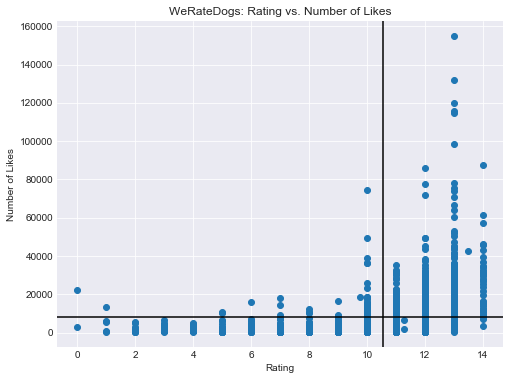

In [57]:
# Visualization
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.scatter(df['rating_numerator'], df['favorite_count'])
plt.title('WeRateDogs: Rating vs. Number of Likes')
plt.xlabel('Rating'), plt.ylabel('Number of Likes')
plt.axhline(df['favorite_count'].mean(), color='black')
plt.axvline(df['rating_numerator'].mean(), color='black');

In [58]:
df[['rating_numerator', 'favorite_count']].corr()

,rating_numerator,favorite_count
rating_numerator,1.0000,0.3879
favorite_count,0.3879,1.0000


**Insights:**

- Posts with an above-average rating by WeRateDogs also receive an above-average number of likes by WeRateDogs' followers in most cases, and vice versa.
- They generally value similar aspects of an image.
- There is a moderate positive correlation between *rating_numerator* and *favorite_count*.

**2. WeRateDogs Development Over Time**

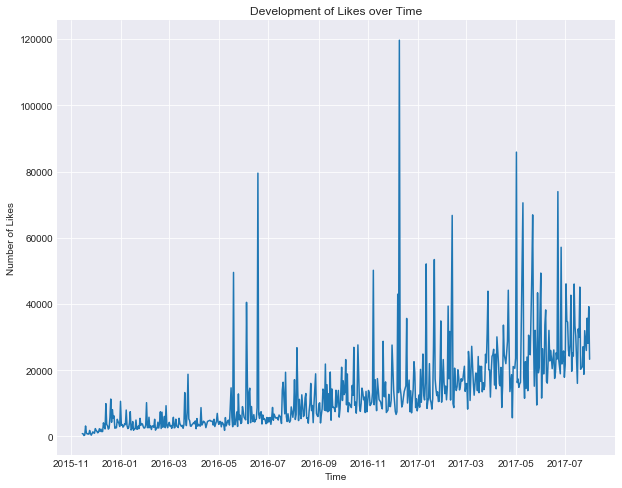

In [59]:
# Visualization
plt.figure(figsize=(10,8))
plt.plot(df.groupby('date')['favorite_count'].mean().index,
        df.groupby('date')['favorite_count'].mean().values)
plt.title('Development of Likes over Time')
plt.xlabel('Time'), plt.ylabel('Number of Likes');

**Insights:**

- The number of likes WeRateDogs received per day has increased over time which is closely related to the popularity of the profile.
- On some days, posts were published that received an extremely large popularity in terms of likes, as the peaks in the visualization show.

Note: The visualization does not indicate the number of likes WeRateDogs got on the given day, but the number of likes WeRateDogs got on the postings of a given day.

### Breed Analysis

**3. Number & Distribution of Breeds**

In [60]:
# Number of breeds
df['pred_breed'].nunique()

113

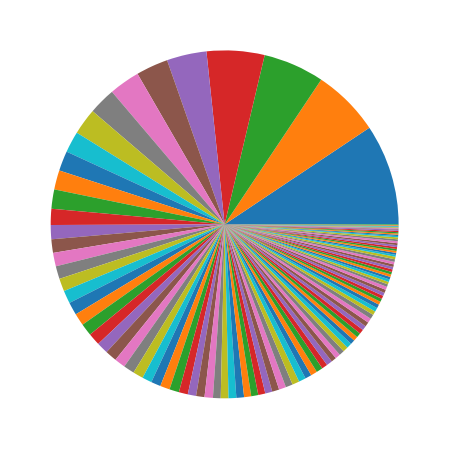

In [61]:
# Visualization: Distribution of unique breeds
plt.figure(figsize=(10,8))
plt.pie(df.pred_breed.value_counts());

**Insights:**
- WeRateDogs posted images of **113 different breeds** in total (according to the neural network predictions).
- The predicted breeds are **equally distributed** (see pie chart).

**4. Breed Popularity**

In [62]:
# Frequency and share of most popular breeds
breeds = pd.DataFrame({'breed': df.pred_breed.value_counts().index,
                       'frequency': df.pred_breed.value_counts().values})
breeds['share'] = breeds['frequency'] / df.pred_breed.value_counts().values.sum()
breeds.head()

,breed,frequency,share
0,golden_retriever,157,0.093675
1,labrador_retriever,105,0.062649
2,pembroke,95,0.056683
3,chihuahua,90,0.053699
4,pug,62,0.036993


In [63]:
# Highest average ratings
df.groupby('pred_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10]

pred_breed
bouvier_des_flandres    13.000000
saluki                  12.500000
briard                  12.333333
tibetan_mastiff         12.250000
border_terrier          12.142857
silky_terrier           12.000000
standard_schnauzer      12.000000
gordon_setter           11.750000
irish_setter            11.750000
samoyed                 11.731707
Name: rating_numerator, dtype: float64

In [64]:
# Most average likes
df.groupby('pred_breed')['favorite_count'].mean().sort_values(ascending=False)[:10]

pred_breed
bedlington_terrier         22822.000000
saluki                     22054.250000
french_bulldog             18626.266667
bouvier_des_flandres       16339.000000
afghan_hound               15648.333333
black-and-tan_coonhound    15545.500000
flat-coated_retriever      15372.625000
irish_water_spaniel        14866.333333
leonberg                   13482.333333
whippet                    13409.454545
Name: favorite_count, dtype: float64

**Insights:**

- **Most popular breeds** in terms of number of posts: golden_retriever, labrador_retriever, pembroke, chihuahua and pug.
- The most popular breed **golden_retriever accounts for nearly 10%** of all WeRateDogs ratings.
- Dogs with breed Bouvier de Flandres received the **highest average rating** by WeRateDogs.
- Posts with Bedlington Terriers and Salukis on average received **most likes** by WeRateDogs' followers.